In [ ]:
%config IPCompleter.greedy=True

In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)
train_data, test_data = imdb['train'], imdb['test']

traning_sentences = []
training_labels = []

testing_sequences = []
testing_labels = []

for s,l in train_data:
  traning_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sequences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_token = "<OOV>"


tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(traning_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(traning_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(testing_sequences)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

In [10]:
import tensorflow as tf

embedding_dim = 64

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 640,397
Trainable params: 640,397
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(padded, training_labels_final, epochs=4, validation_data=(test_padded, testing_labels_final))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 8s 330us/sample - loss: 0.1882 - accuracy: 0.9309 - val_loss: 0.4182 - val_accuracy: 0.8339
Epoch 2/4
25000/25000 [==============================] - 8s 304us/sample - loss: 0.1701 - accuracy: 0.9389 - val_loss: 0.4428 - val_accuracy: 0.8324
Epoch 3/4
25000/25000 [==============================] - 8s 305us/sample - loss: 0.1535 - accuracy: 0.9474 - val_loss: 0.4883 - val_accuracy: 0.8221
Epoch 4/4
25000/25000 [==============================] - 8s 304us/sample - loss: 0.1394 - accuracy: 0.9523 - val_loss: 0.5250 - val_accuracy: 0.8231


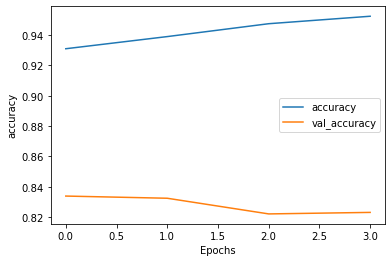

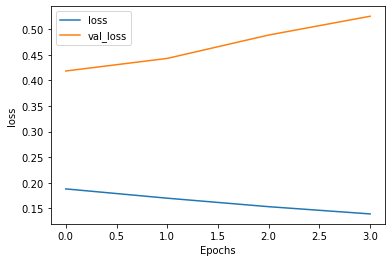

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')